In [ ]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import pickle

In [ ]:
HepatitisC_Dataset = pd.read_csv('/content/sample_data/HepatitisCdata.csv') 

In [ ]:
HepatitisC_Dataset.head(10)

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
5,6,0=Blood Donor,32,m,41.6,43.3,18.5,19.7,12.3,9.92,6.05,111.0,91.0,74.0
6,7,0=Blood Donor,32,m,46.3,41.3,17.5,17.8,8.5,7.01,4.79,70.0,16.9,74.5
7,8,0=Blood Donor,32,m,42.2,41.9,35.8,31.1,16.1,5.82,4.60,109.0,21.5,67.1
8,9,0=Blood Donor,32,m,50.9,65.5,23.2,21.2,6.9,8.69,4.10,83.0,13.7,71.3
9,10,0=Blood Donor,32,m,42.4,86.3,20.3,20.0,35.2,5.46,4.45,81.0,15.9,69.9


Biểu đồ tần suất tuổi

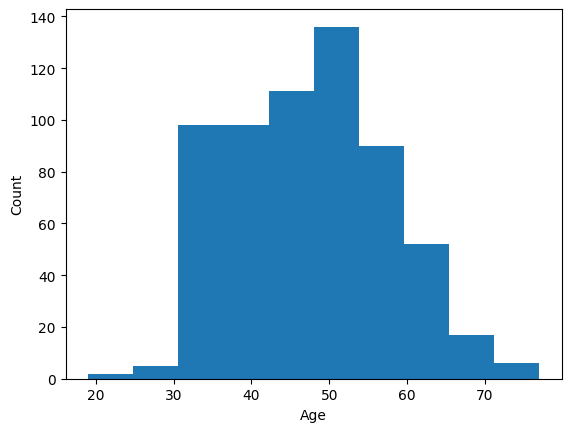

In [ ]:
import matplotlib.pyplot as plt

plt.hist(HepatitisC_Dataset['Age'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Biểu đồ tần suất giới tính

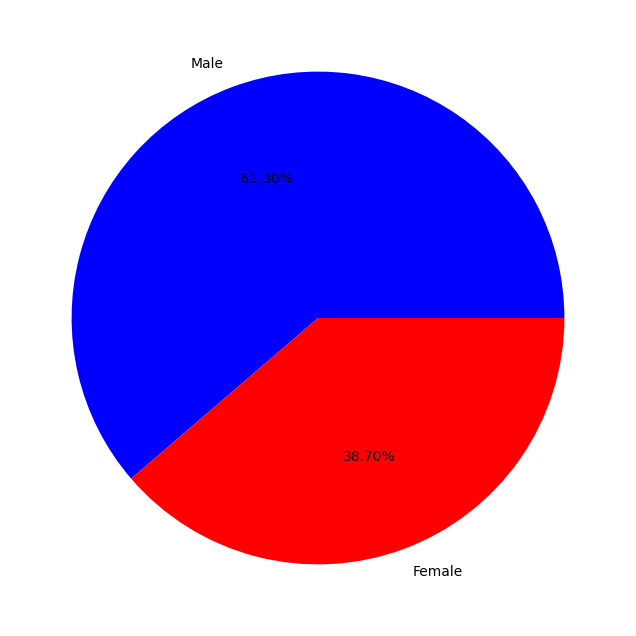

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
plt.pie(x=HepatitisC_Dataset["Sex"].value_counts(), 
        colors=["blue","red"], 
        labels=["Male","Female"], 
        autopct="%1.2f%%", 
        )
plt.show()

Phân phối các kết quả xét nghiệm máu khác nhau theo danh mục

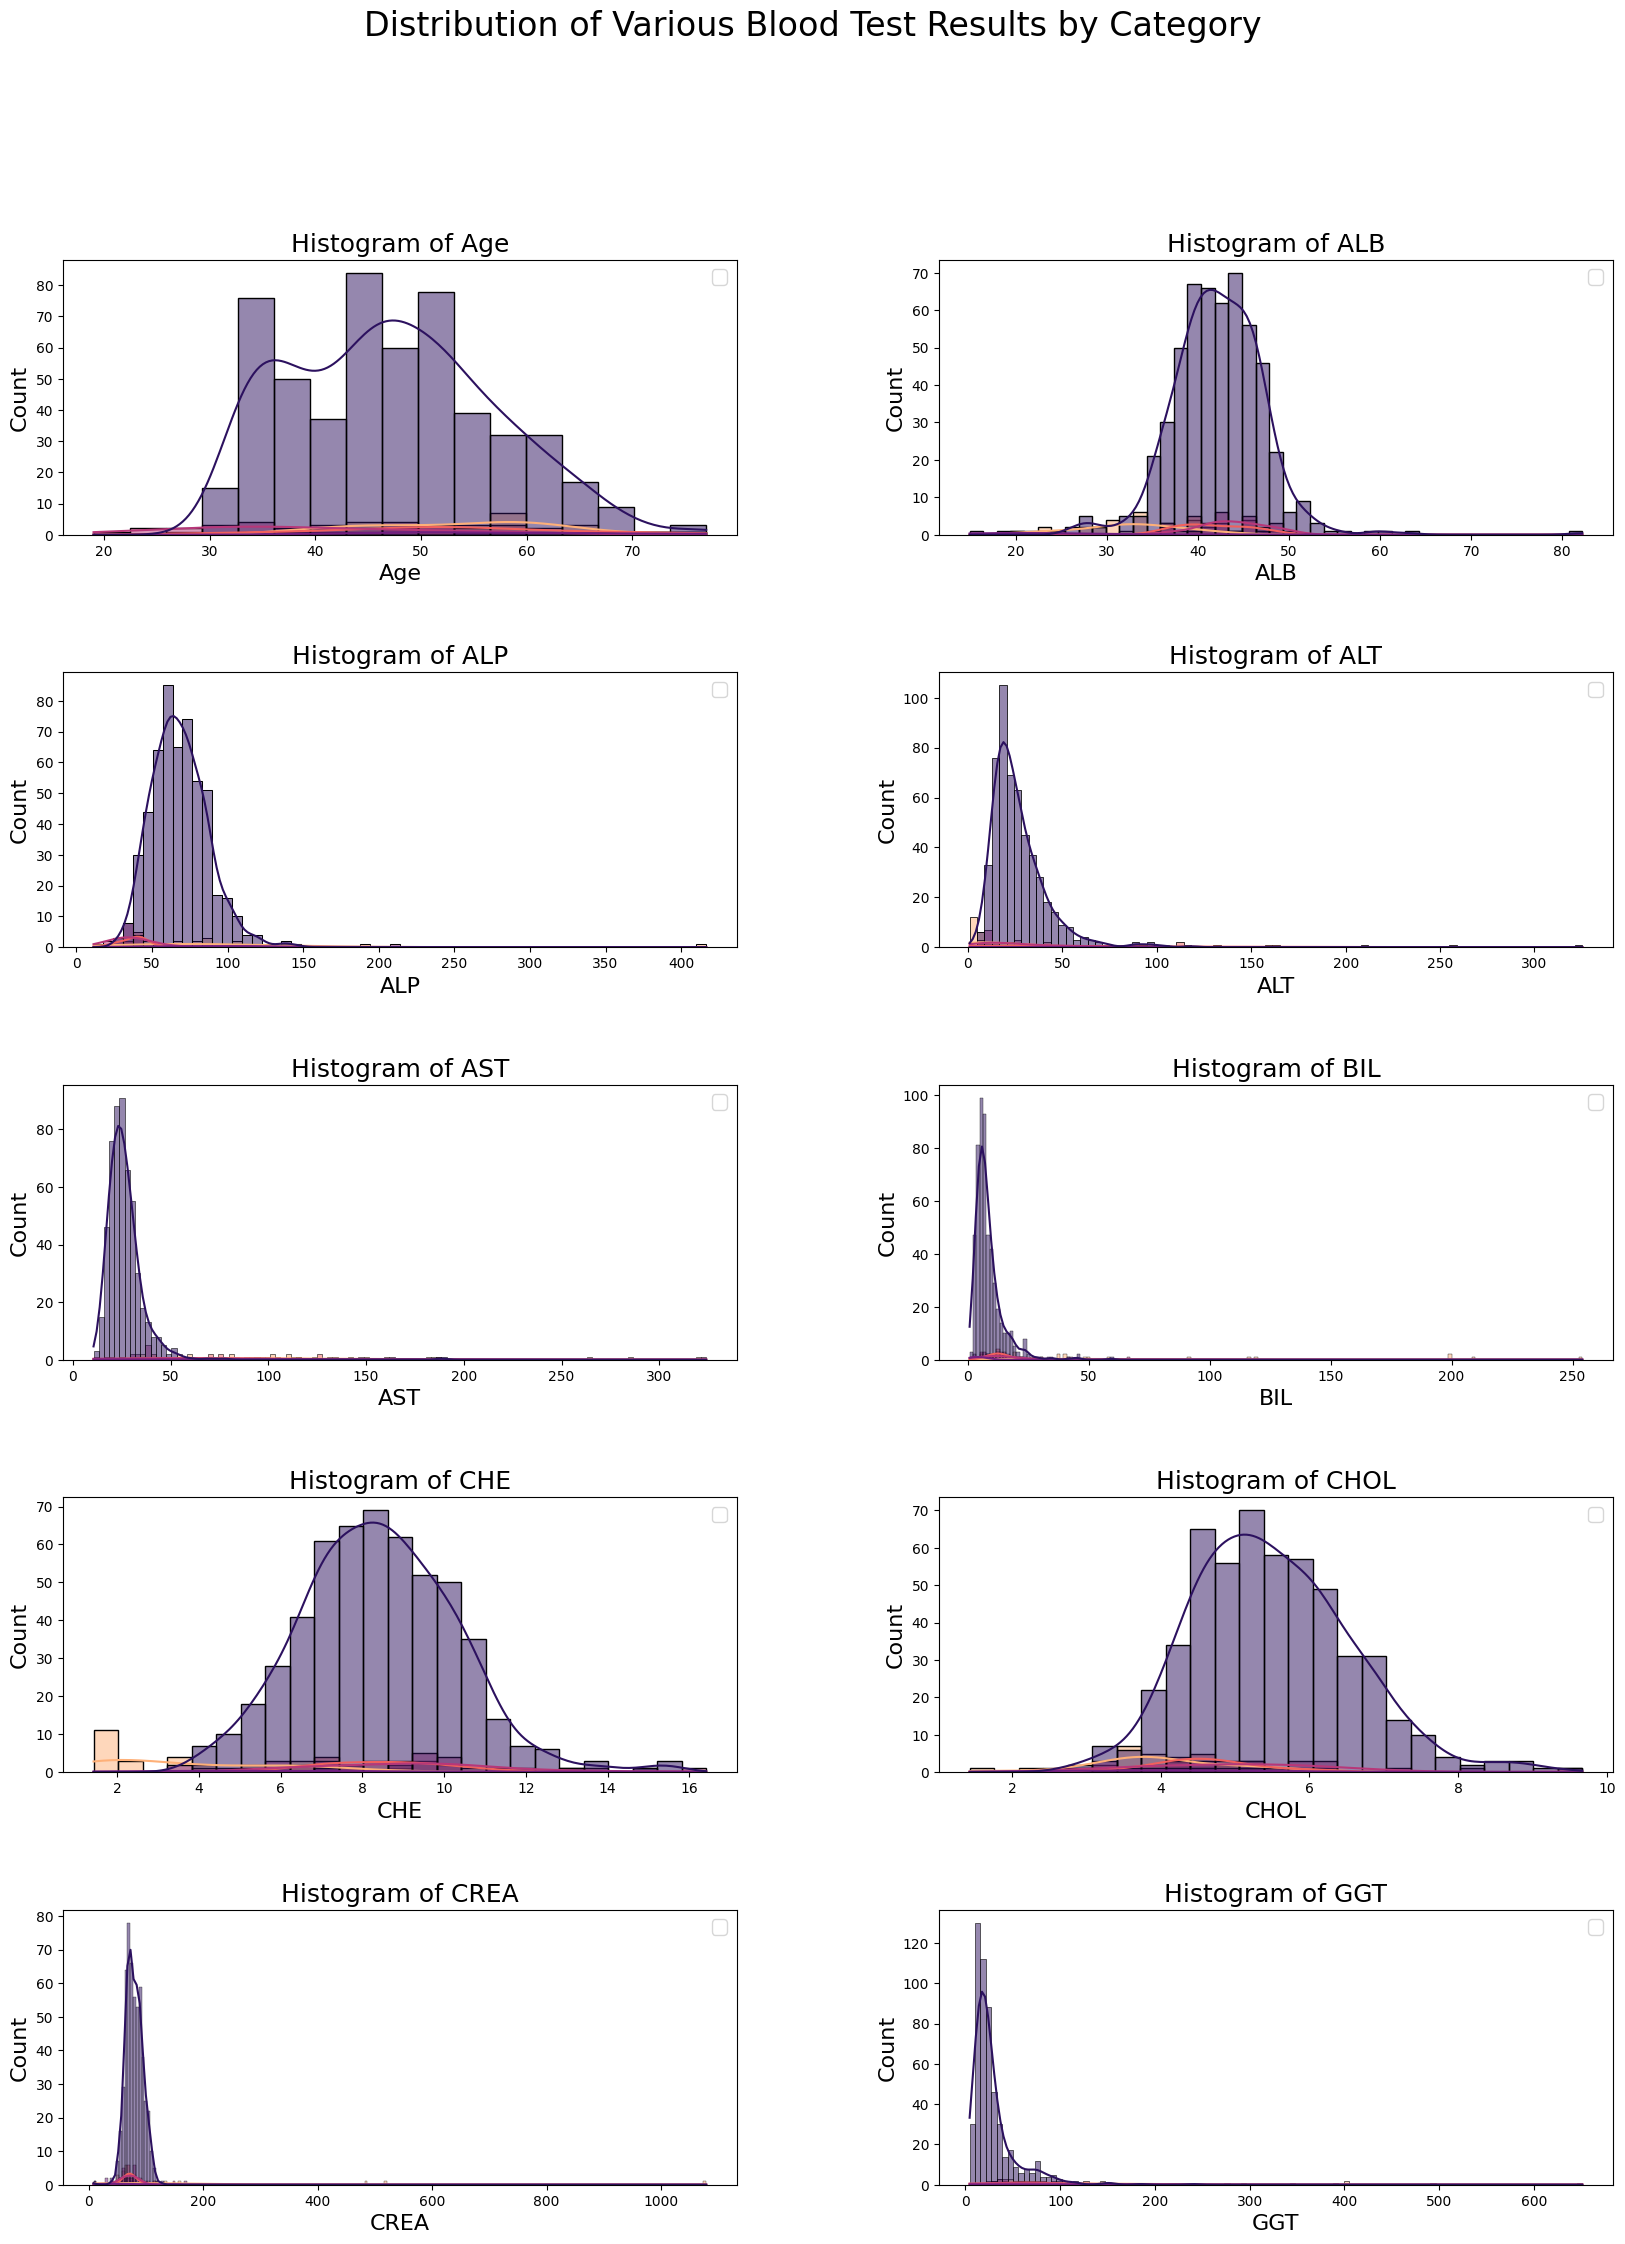

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


fig, axes = plt.subplots(5, 2, figsize=(20, 25))
axes = axes.flatten()


columns = ["Age", "ALB", "ALP", "ALT", "AST", "BIL", "CHE", "CHOL", "CREA", "GGT"]


for i, col in enumerate(columns):
    sns.histplot(x=HepatitisC_Dataset[col], hue=HepatitisC_Dataset["Category"], kde=True, palette="magma", ax=axes[i])
    axes[i].set_xlabel(col, fontsize=16)  
    axes[i].set_ylabel("Count", fontsize=16)  
    axes[i].set_title(f"Histogram of {col}", fontsize=18) 
    axes[i].legend(fontsize=14) 


fig.suptitle("Distribution of Various Blood Test Results by Category", fontsize=24)


plt.subplots_adjust(hspace=0.5, wspace=0.3)  

In [ ]:
HepatitisC_Dataset.columns = ['Patient_ID', 'Category', 'Age', 'Gender', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']

In [ ]:
HepatitisC_Dataset.head(10)

,Patient_ID,Category,Age,Gender,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
5,6,0=Blood Donor,32,m,41.6,43.3,18.5,19.7,12.3,9.92,6.05,111.0,91.0,74.0
6,7,0=Blood Donor,32,m,46.3,41.3,17.5,17.8,8.5,7.01,4.79,70.0,16.9,74.5
7,8,0=Blood Donor,32,m,42.2,41.9,35.8,31.1,16.1,5.82,4.60,109.0,21.5,67.1
8,9,0=Blood Donor,32,m,50.9,65.5,23.2,21.2,6.9,8.69,4.10,83.0,13.7,71.3
9,10,0=Blood Donor,32,m,42.4,86.3,20.3,20.0,35.2,5.46,4.45,81.0,15.9,69.9


Bỏ cột Patient_ID

In [ ]:
HepatitisC_Dataset = HepatitisC_Dataset.drop('Patient_ID', axis=1)

sửa lại loại dữ liệu thành: nhóm không viêm gan (0) và nhóm có viêm gan (1)

In [ ]:
HepatitisC_Dataset['Category'] = HepatitisC_Dataset['Category'].replace({'0=Blood Donor': 0, '0s=suspect Blood Donor': 0, '1=Hepatitis': 1, '2=Fibrosis': 1, '3=Cirrhosis': 1})

In [ ]:
HepatitisC_Dataset['Gender'] = HepatitisC_Dataset['Gender'].replace({'m': 0, 'f': 1})

In [ ]:
HepatitisC_Dataset

,Category,Age,Gender,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,32,0,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0,32,0,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0,32,0,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0,32,0,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0,32,0,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,1,62,1,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,1,64,1,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,1,64,1,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,1,46,1,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


Loại bỏ các hàng trùng lặp trong tập dữ liệu và kiểm tra số lượng giá trị thiếu trong từng cột

In [ ]:
HepatitisC_Dataset = HepatitisC_Dataset.drop_duplicates()

In [ ]:
print(HepatitisC_Dataset.isnull().sum())

Category     0
Age          0
Gender       0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
dtype: int64


Điền các giá trị thiếu bằng giá trị trung bình của từng cột tương ứng

In [ ]:
HepatitisC_Dataset['ALB'].fillna(HepatitisC_Dataset['ALB'].mean(), inplace=True) 
HepatitisC_Dataset['ALP'].fillna(HepatitisC_Dataset['ALP'].mean(), inplace=True) 
HepatitisC_Dataset['ALT'].fillna(HepatitisC_Dataset['ALT'].mean(), inplace=True) 
HepatitisC_Dataset['CHOL'].fillna(HepatitisC_Dataset['CHOL'].mean(), inplace=True) 
HepatitisC_Dataset['PROT'].fillna(HepatitisC_Dataset['PROT'].mean(), inplace=True) 


print(HepatitisC_Dataset.isnull().sum()) 

Category    0
Age         0
Gender      0
ALB         0
ALP         0
ALT         0
AST         0
BIL         0
CHE         0
CHOL        0
CREA        0
GGT         0
PROT        0
dtype: int64


In [ ]:
HepatitisC_Dataset.shape

(615, 13)

In [ ]:
HepatitisC_Dataset['Category'].value_counts()

0    540
1     75
Name: Category, dtype: int64

In [ ]:
X = HepatitisC_Dataset.drop (columns='Category', axis=1)
Y = HepatitisC_Dataset['Category']

In [ ]:
print(X)

     Age  Gender   ALB        ALP    ALT    AST   BIL    CHE  CHOL   CREA  \
0     32       0  38.5   52.50000    7.7   22.1   7.5   6.93  3.23  106.0   
1     32       0  38.5   70.30000   18.0   24.7   3.9  11.17  4.80   74.0   
2     32       0  46.9   74.70000   36.2   52.6   6.1   8.84  5.20   86.0   
3     32       0  43.2   52.00000   30.6   22.6  18.9   7.33  4.74   80.0   
4     32       0  39.2   74.10000   32.6   24.8   9.6   9.15  4.32   76.0   
..   ...     ...   ...        ...    ...    ...   ...    ...   ...    ...   
610   62       1  32.0  416.60000    5.9  110.3  50.0   5.57  6.30   55.7   
611   64       1  24.0  102.80000    2.9   44.4  20.0   1.54  3.02   63.0   
612   64       1  29.0   87.30000    3.5   99.0  48.0   1.66  3.63   66.7   
613   46       1  33.0   68.28392   39.0   62.0  20.0   3.56  4.20   52.0   
614   59       1  36.0   68.28392  100.0   80.0  12.0   9.07  5.30   67.0   

       GGT  PROT  
0     12.1  69.0  
1     15.6  76.5  
2     33.2  79.3  

In [ ]:
print(Y)

0      0
1      0
2      0
3      0
4      0
      ..
610    1
611    1
612    1
613    1
614    1
Name: Category, Length: 615, dtype: int64


Lớp StandardScaler trong scikit-learn được sử dụng để chuẩn hóa dữ liệu theo phương pháp chuẩn hóa Z-score.

In [ ]:
scaler = StandardScaler()

Sử dụng phương thức fit() của scaler để tính toán các giá trị trung bình và độ lệch chuẩn từ dữ liệu trong biến X. Quá trình fit() này tính toán các tham số dựa trên dữ liệu huấn luyện để sau đó áp dụng cho việc chuẩn hóa dữ liệu.

In [ ]:
scaler.fit(X)

StandardScaler()

Sử dụng phương thức transform() của scaler để chuẩn hóa dữ liệu trong biến X thành standarized_data. Phương thức này áp dụng các phép biến đổi chuẩn hóa dữ liệu dựa trên các giá trị trung bình và độ lệch chuẩn đã tính toán từ quá trình fit().

In [ ]:
standarized_data = scaler.transform(X)

In [ ]:
print(standarized_data)

[[-1.53361617 -0.79454373 -0.54064724 ...  0.49707027 -0.50228619
  -0.56437244]
 [-1.53361617 -0.79454373 -0.54064724 ... -0.14658961 -0.43820313
   0.82610164]
 [-1.53361617 -0.79454373  0.91485031 ...  0.09478284 -0.11595686
   1.34521196]
 ...
 [ 1.65143725  1.25858397 -2.18674566 ... -0.29342452  0.45163601
   1.84578263]
 [-0.1401553   1.25858397 -1.49365159 ... -0.58910578  0.19164186
  -0.19357936]
 [ 1.15377266  1.25858397 -0.97383104 ... -0.28739021 -0.1013093
  -0.74976899]]


X chứa dữ liệu đã được chuẩn hóa, trong khi biến Y chứa nhãn (labels) từ cột 'Category'

Chuẩn bị dữ liệu để sử dụng trong quá trình huấn luyện mô hình học máy, với X đại diện cho ma trận đặc trưng (feature matrix) và Y đại diện cho vector nhãn (label vector)

In [ ]:
X = standarized_data
Y = HepatitisC_Dataset['Category']

In [ ]:
print(X)
print(Y)

[[-1.53361617 -0.79454373 -0.54064724 ...  0.49707027 -0.50228619
  -0.56437244]
 [-1.53361617 -0.79454373 -0.54064724 ... -0.14658961 -0.43820313
   0.82610164]
 [-1.53361617 -0.79454373  0.91485031 ...  0.09478284 -0.11595686
   1.34521196]
 ...
 [ 1.65143725  1.25858397 -2.18674566 ... -0.29342452  0.45163601
   1.84578263]
 [-0.1401553   1.25858397 -1.49365159 ... -0.58910578  0.19164186
  -0.19357936]
 [ 1.15377266  1.25858397 -0.97383104 ... -0.28739021 -0.1013093
  -0.74976899]]
0      0
1      0
2      0
3      0
4      0
      ..
610    1
611    1
612    1
613    1
614    1
Name: Category, Length: 615, dtype: int64


Chia bộ dữ liệu ra huấn luyện

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, stratify=Y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(615, 12) (492, 12) (123, 12)


**Sử dụng SVM huấn luyện mô hình**

Khởi tạo một bộ phân loại SVM (Support Vector Machine) với kernel tuyến tính (linear)

In [ ]:
classifier = svm.SVC(kernel='linear')

Sử dụng phương thức fit() của đối tượng classifier để huấn luyện mô hình SVM trên tập dữ liệu huấn luyện (X_train và Y_train)

In [ ]:
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

Sử dụng phương thức predict() của đối tượng classifier để dự đoán nhãn cho tập dữ liệu huấn luyện X_train. Kết quả dự đoán được gán cho biến X_train_prediction. Sau đó, chúng ta sử dụng hàm accuracy_score từ sklearn.metrics để tính toán độ chính xác của dự đoán trên tập dữ liệu huấn luyện. Hàm accuracy_score so sánh dự đoán X_train_prediction với nhãn thực tế Y_train và tính toán tỷ lệ đúng (accuracy).

In [ ]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('accuracy = ',training_data_accuracy)

accuracy =  0.9715447154471545


Tính toán độ chính xác trên tập dữ liệu test

In [ ]:
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('accurancy data testing = ',test_data_accuracy)

accurancy data testing =  0.967479674796748


**Sử dụng Hồi quy tuyến tính xem thử liệu kết quả chính xác có cao hơn không**

Module r2_score được sử dụng để tính toán hệ số xác định (coefficient of determination) R-squared, là một phép đánh giá thông qua việc so sánh giữa giá trị dự đoán và giá trị thực tế.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


Sử dụng phương thức fit() của đối tượng regressor để huấn luyện mô hình trên tập dữ liệu huấn luyện. Sau đó dùng phương thức predict() của đối tượng regressor để dự đoán giá trị đầu ra cho tập dữ liệu huấn luyện X_train. Cuối cùng, sử dụng hàm r2_score từ sklearn.metrics để tính toán hệ số xác định (R-squared) của mô hình trên tập dữ liệu huấn luyện. Hàm r2_score so sánh giá trị dự đoán Y_train_prediction với giá trị thực tế Y_train và tính toán hệ số xác định R^2.

In [ ]:
regressor = LinearRegression()

# Huấn luyện mô hình trên dữ liệu huấn luyện
regressor.fit(X_train, Y_train)

# Dự đoán giá trị đầu ra cho dữ liệu huấn luyện
Y_train_prediction = regressor.predict(X_train)

# Tính hệ số xác định R^2 của mô hình trên dữ liệu huấn luyện
training_data_r2_score = r2_score(Y_train, Y_train_prediction)

In [ ]:
print('accuracy = ',training_data_r2_score)

accuracy =  0.5240257824894623


In [ ]:
# Dự đoán giá trị đầu ra cho dữ liệu kiểm thử
Y_test_prediction = regressor.predict(X_test)

# Tính hệ số xác định R^2 của mô hình trên dữ liệu kiểm thử
test_data_r2_score = r2_score(Y_test, Y_test_prediction)


In [ ]:
print('accurancy data testing = ',test_data_r2_score)

accurancy data testing =  0.601950751369789


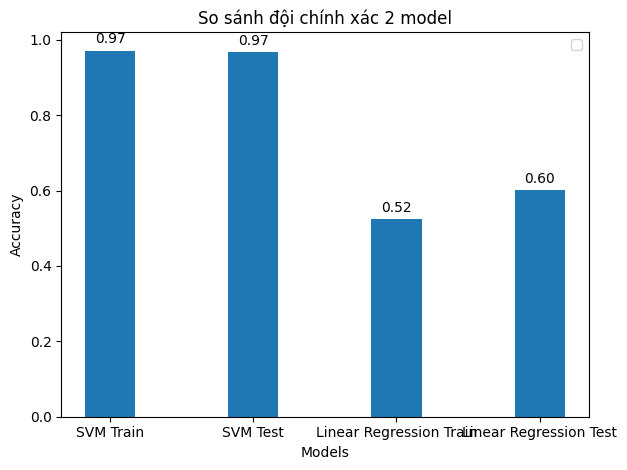

In [ ]:
import matplotlib.pyplot as plt

# Độ chính xác của mô hình SVM trên tập huấn luyện và tập kiểm thử
svm_train_accuracy = training_data_accuracy
svm_test_accuracy = test_data_accuracy

# Độ chính xác của mô hình hồi quy tuyến tính trên tập huấn luyện và tập kiểm thử
linear_regression_train_accuracy = training_data_r2_score
linear_regression_test_accuracy = test_data_r2_score

# Xác định các nhãn và chiều rộng cột
labels = ['SVM Train', 'SVM Test', 'Linear Regression Train', 'Linear Regression Test']
accuracies = [svm_train_accuracy, svm_test_accuracy, linear_regression_train_accuracy, linear_regression_test_accuracy]
bar_width = 0.35

# Vẽ biểu đồ cột
fig, ax = plt.subplots()
rects = ax.bar(labels, accuracies, bar_width)

# Gán nhãn cho cột
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('So sánh đội chính xác 2 model')
ax.legend()

# Hiển thị giá trị của từng cột
for rect in rects:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


Khai báo input_data là một tuple chứa các giá trị đầu vào mới.

Tiếp theo, chúng ta chuyển đổi input_data thành một mảng numpy bằng cách sử dụng np.array(input_data).

Sau đó, chúng ta cần thay đổi hình dạng của mảng đầu vào thành (1, -1) bằng cách sử dụng input_data_reshape = input_data_as_numpy_array.reshape(1, -1). Điều này là cần thiết để phù hợp với kích thước đầu vào mong muốn cho mô hình.

Tiếp theo, chúng ta chuẩn hóa dữ liệu đầu vào mới bằng cách sử dụng scaler.transform(input_data_reshape). Kết quả được gán cho biến std_data.

Sau đó, chúng ta sử dụng phương thức predict() của đối tượng classifier để dự đoán nhãn cho dữ liệu đầu vào đã được chuẩn hóa std_data. Kết quả dự đoán được gán cho biến prediction.

In [ ]:
input_data = (32, 0, 38.5, 52.5, 7.7, 22.1, 7.5, 6.93, 3.23, 106, 12.1, 69)

input_data_as_numpy_array = np.array(input_data)

input_data_reshape = input_data_as_numpy_array.reshape(1, -1)

std_data = scaler.transform(input_data_reshape)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
    print('Bệnh nhân được chẩn đoán không bị viêm gan C')
else :
    print('Bệnh nhân được chẩn đoán bị viêm gan C')

[[-1.53361617 -0.79454373 -0.54064724 -0.61600357 -0.81605387 -0.38369306
  -0.19823566 -0.57473353 -1.9046761   0.49707027 -0.50228619 -0.56437244]]
[0]
Bệnh nhân được chẩn đoán không bị viêm gan C


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
input_data = (23, 0, 47, 19.1, 38.9, 164.2, 17, 7.09, 3.2, 79.3, 90.4, 70.1)

input_data_as_numpy_array = np.array(input_data)

input_data_reshape = input_data_as_numpy_array.reshape(1, -1)

std_data = scaler.transform(input_data_reshape)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
    print('Bệnh nhân được chẩn đoán không bị viêm gan C')
else :
    print('Bệnh nhân được chẩn đoán bị viêm gan C')

[[-2.42941245 -0.79454373  0.93217766 -1.91951498  0.41092837  3.91406163
   0.28504907 -0.50213375 -1.93140091 -0.03998345  0.93134353 -0.36043624]]
[1]
Bệnh nhân được chẩn đoán bị viêm gan C


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Lưu mô hình

In [ ]:
filename = 'viemganc_SVM.sav'
pickle.dump(classifier, open(filename, 'wb'))